In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [4]:
df = pd.read_csv('IMDb_Dataset.csv')

### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [6]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [16]:
# Sort by IMDb Rating from highest to lowest
df_sorted = df.sort_values(by='IMDb Rating', ascending=False)

# Display a few rows 
df_sorted.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
1710,Marty's Project,9.5,2010,R,Comedy,Andrew Kent,Naomi AshDavid BedfordJoanna Deering,66.0,https://m.media-amazon.com/images/M/MV5BM2U4Yz...,116.3
2100,The People's Story,9.5,2000,PG,Documentary,Steven Scaffidi,Daniel RadcliffeEmma WatsonRupert Grint,66.0,https://m.media-amazon.com/images/M/MV5BMjQ3MG...,56.0
3172,The Shawshank Redemption,9.3,1994,R,Drama,Frank Darabont,Tim RobbinsMorgan FreemanBob Gunton,82.0,https://m.media-amazon.com/images/M/MV5BNDE3OD...,142.0
2102,Loving Carmen,9.3,2016,G,Documentary,Nayo Titzin,Nayo Titzin,66.0,https://m.media-amazon.com/images/M/MV5BZTY5N2...,66.0
1344,Fuga dalla Morte,9.2,2023,R,Adventure,Michael Righini,Nicola AdobatiAndrea BaglioNicol Benvenuti,66.0,https://m.media-amazon.com/images/M/MV5BMDA5Nj...,116.3


In [8]:
df.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,3173.000000,3173.000000,3173.000000,3173.000000
mean,6.931012,2004.958399,65.993066,116.304822
std,0.805202,16.819985,11.358619,22.123032
min,3.900000,1917.000000,20.000000,46.000000
25%,6.400000,1997.000000,64.000000,105.000000
50%,6.900000,2010.000000,66.000000,116.300000
75%,7.500000,2017.000000,69.000000,122.000000
max,9.500000,2025.000000,100.000000,317.000000


In [9]:
df.isna().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Poster-src            0
Duration (minutes)    0
dtype: int64

In [10]:
#Selecting relevant columns for a correlation matrix
correlation_columns = ['MetaScore', 'Duration (minutes)', 'Year', 'IMDb Rating']

#Computing the correaltion
correlation_df = df[correlation_columns].corr()

#Displaying the correlation
print(correlation_df)


                    MetaScore  Duration (minutes)      Year  IMDb Rating
MetaScore            1.000000            0.123072 -0.116401     0.439811
Duration (minutes)   0.123072            1.000000 -0.132043     0.212704
Year                -0.116401           -0.132043  1.000000    -0.053147
IMDb Rating          0.439811            0.212704 -0.053147     1.000000


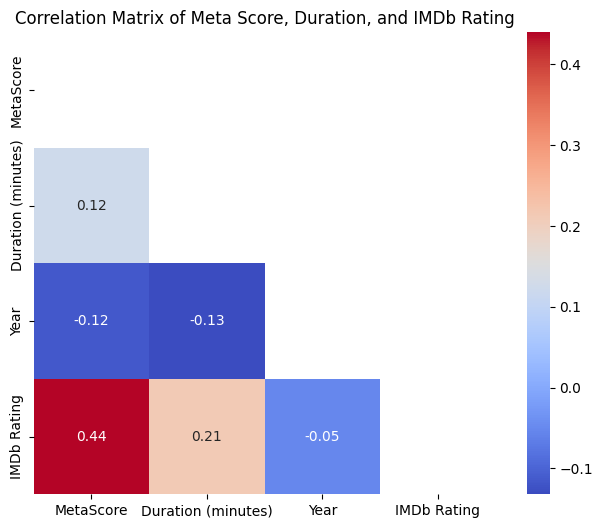

In [11]:

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_df, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(correlation_df, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', square=True)

# Title and show plot
plt.title('Correlation Matrix of Meta Score, Duration, and IMDb Rating')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9864\113030894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=certificate_counts.index, y=certificate_counts.values, palette='viridis')


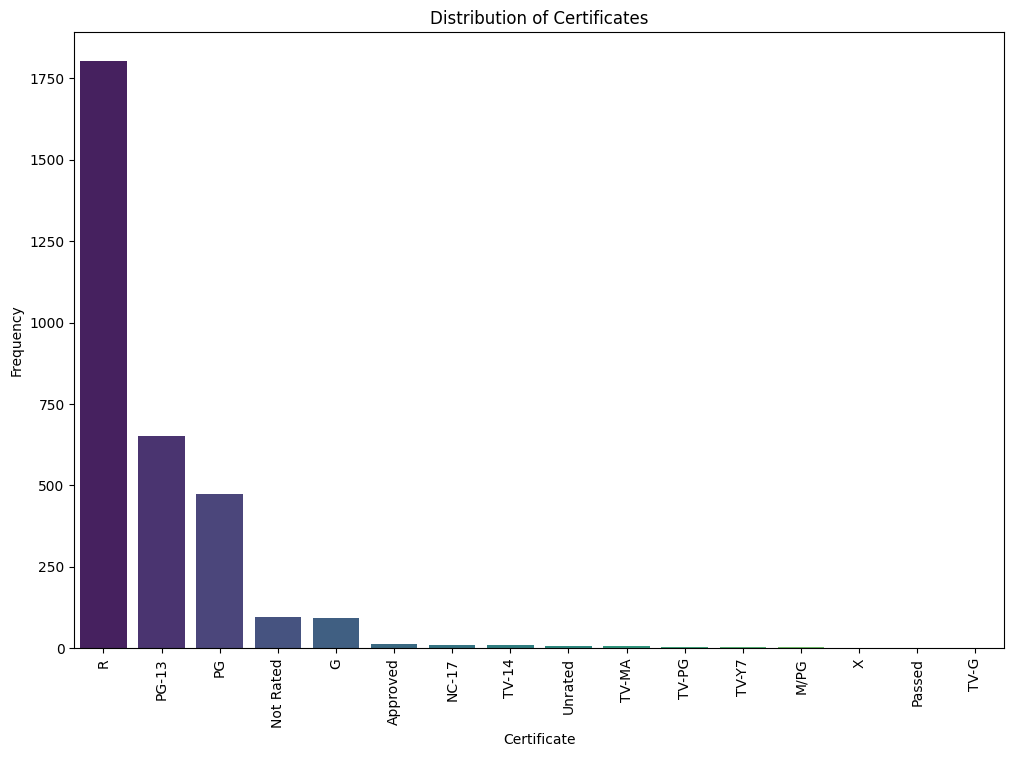

In [12]:
# Count the frequency of each certificate
certificate_counts = df['Certificates'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=certificate_counts.index, y=certificate_counts.values, palette='viridis')
plt.title('Distribution of Certificates')
plt.xlabel('Certificate')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

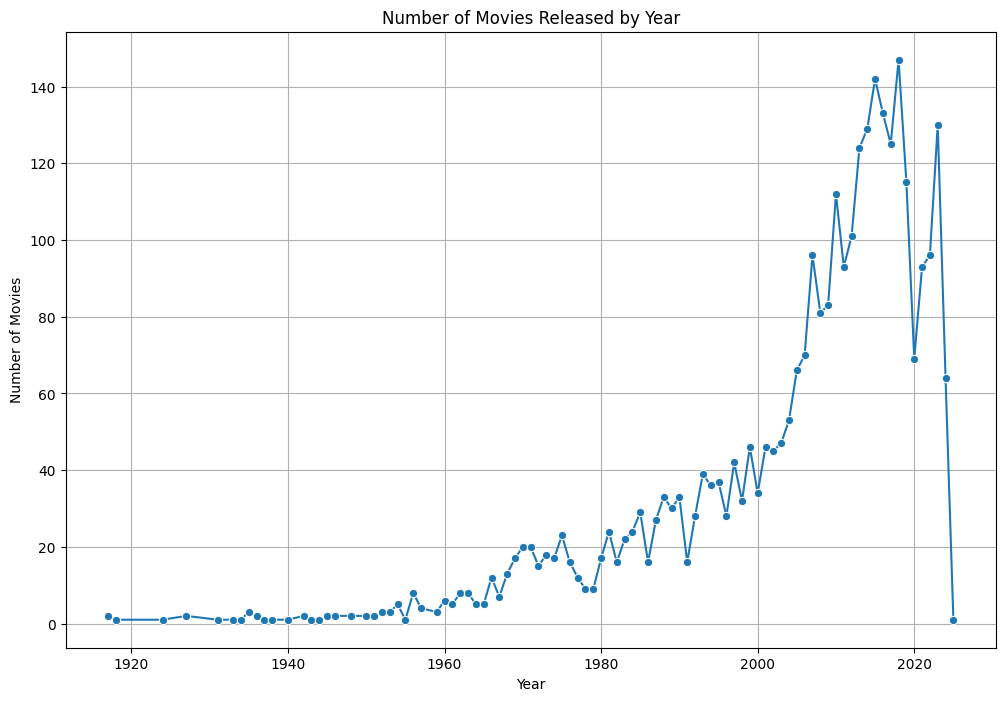

In [13]:
# Count the number of movies released each year
year_counts = df['Year'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()